# 0.0 - Imports Libraries

In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1.0 - Load Dataset

In [2]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Algoritmo: Polinomial Regression

Parâmetro
* degree

In [4]:
# Define
poly_train = PolynomialFeatures()
X_poly_train = poly_train.fit_transform( df_X_train )


# Training
poly_reg = LinearRegression()
poly_reg.fit( X_poly_train, df_y_train )


# Performance
y_pred_train = poly_reg.predict( X_poly_train )


# Performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train:4}' )
print( f'Train MSE: {mse_train:4}' )
print( f'Train RMSE: {rmse_train:4}' )
print( f'Train MAE: {mae_train:4}' )
print( f'Train MAPE: {mape_train:4}' )

Train R2: 0.09419491057528084
Train MSE: 432.9862096386579
Train RMSE: 20.80832068280999
Train MAE: 16.45803175582444
Train MAPE: 8.350539820928116


## 2.2 - Performance for Validation Dataset

In [10]:
# Define
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val = poly.fit_transform( df_X_val )

# Training
poly_reg = LinearRegression()
poly_reg.fit( X_poly_train, df_y_train )

# Performance
y_pred_val = poly_reg.predict( X_poly_val )

# Performance Metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )

print( f'Validation R2: {r2_val:.7}' )
print( f'Validation MSE: {mse_val:.7}' )
print( f'Validation RMSE: {rmse_val:.7}' )
print( f'Validation MAE: {mae_val:.7}' )
print( f'Validation MAPE: {mape_val:.7}' )

Validation R2: 0.06647668
Validation MSE: 445.7682
Validation RMSE: 21.11322
Validation MAE: 16.74994
Validation MAPE: 8.547931


## 2.3 - Hyperparameter Fine Tuning

In [11]:
degree = np.arange( 1, 6 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [12]:
for d in degree: 
    # Definiti Polynomial Model
    poly = PolynomialFeatures( degree=d )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val = poly.fit_transform( df_X_val )


    # training
    poly_reg = LinearRegression()
    poly_reg.fit( X_poly_train, df_y_train )

    # predict
    y_pred = poly_reg.predict( X_poly_val )

    # Performance Metrics
    r2_d = mt.r2_score( df_y_val, y_pred )
    mse_d = mt.mean_squared_error( df_y_val, y_pred )
    rmse_d = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae_d = mt.mean_absolute_error( df_y_val, y_pred )
    mape_d = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list.append( r2_d )
    mse_list.append( mse_d )
    rmse_list.append( rmse_d )
    mae_list.append( mae_d )
    mape_list.append( mape_d )


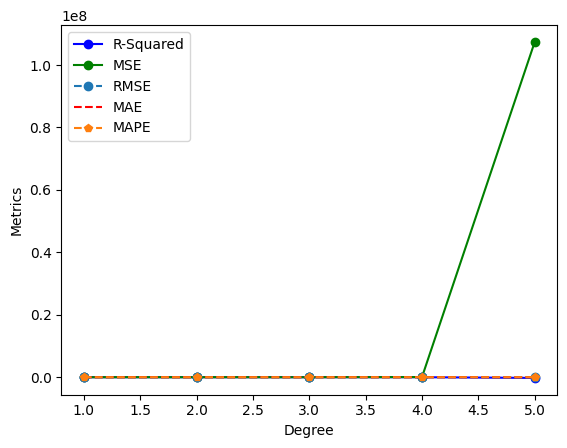

In [13]:
plt.plot( degree, r2_list, 'bo-', label='R-Squared')
plt.plot( degree, mse_list, 'go-', label='MSE')
plt.plot( degree, rmse_list, 'o--', label='RMSE')
plt.plot( degree, mae_list, 'r--', label='MAE')
plt.plot( degree, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Degree' )
plt.ylabel( 'Metrics' )
plt.legend();

In [14]:
best_degree = degree[ np.argmin( mse_list) ]
best_degree

2

## 2.4 - Performance for Test Dataset

In [17]:
# Define Polynomial Model
poly = PolynomialFeatures( degree=best_degree )
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val = poly.fit_transform( df_X_val )
X_poly_test = poly.fit_transform( df_X_test )

# Training
poly_reg = LinearRegression()
poly_reg.fit( np.concatenate((X_poly_train, X_poly_val)), np.concatenate(( df_y_train, df_y_val)) )

# Performance
y_pred_test = poly_reg.predict( X_poly_test )

# Performance Metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )

print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.0909006
Test MSE: 442.6414
Test RMSE: 21.03904
Test MAE: 16.73641
Test MAPE: 8.276972
